**Pedestrian Path Analysis**

To assess the concentration of pedestrian paths within a specific area, providing an indication of how well-developed the pedestrian infrastructure is in that neighborhood.


**IMPORTING NECESSARY LIBRARIES:**

In [2]:
import geopandas as gpd
import folium
from folium import plugins
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

**Mounting Google Drive:**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading GeoDataFrame with Pedestrian Paths:**

In [9]:
pedestrian_data = gpd.read_file("/content/drive/My Drive/Data Visualization/Vernazza.geojson")

**Visualizing Pedestrian Paths Density using GeoPandas:**

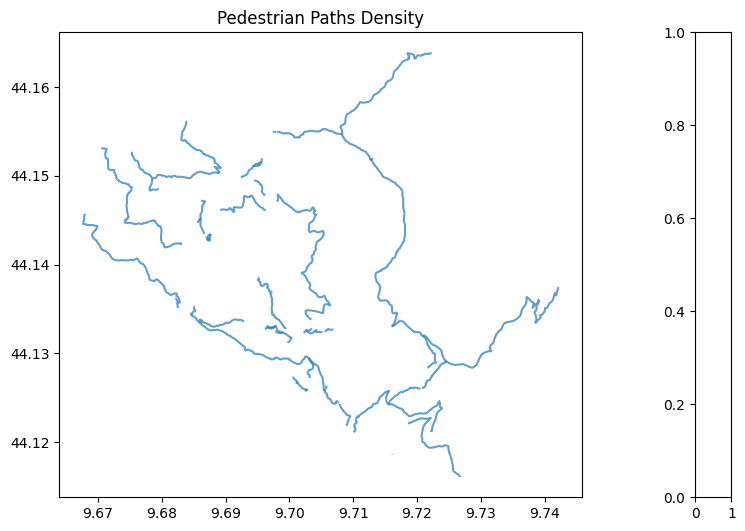

In [7]:
#PLOTTING PATH DENSITY IN VERNAZZA
fig, ax = plt.subplots(figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
pedestrian_data.plot(ax=ax, alpha=0.7, legend=True, cax=cax)
ax.set_title("Pedestrian Paths Density")

# Display the plot
plt.show()

**Creating a Folium Map:**

In [8]:
# Create a Folium map centered around the pedestrian data
map_center = [pedestrian_data.geometry.centroid.y.mean(), pedestrian_data.geometry.centroid.x.mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# Add pedestrian paths to the map
folium.GeoJson(pedestrian_data).add_to(mymap)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in pedestrian_data.geometry.centroid]
plugins.HeatMap(heat_data).add_to(mymap)

#display map
display(mymap)

<ipython-input-8-1c3dd9e7dbea>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [pedestrian_data.geometry.centroid.y.mean(), pedestrian_data.geometry.centroid.x.mean()]
<ipython-input-8-1c3dd9e7dbea>:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  heat_data = [[point.xy[1][0], point.xy[0][0]] for point in pedestrian_data.geometry.centroid]


**NUMERICAL HISTOGRAM:**

In the context of 'width', we can see if most roads have similar widths or if there's a wide range of widths. The shape of the histogram provides insights into the distribution of this numeric variable.

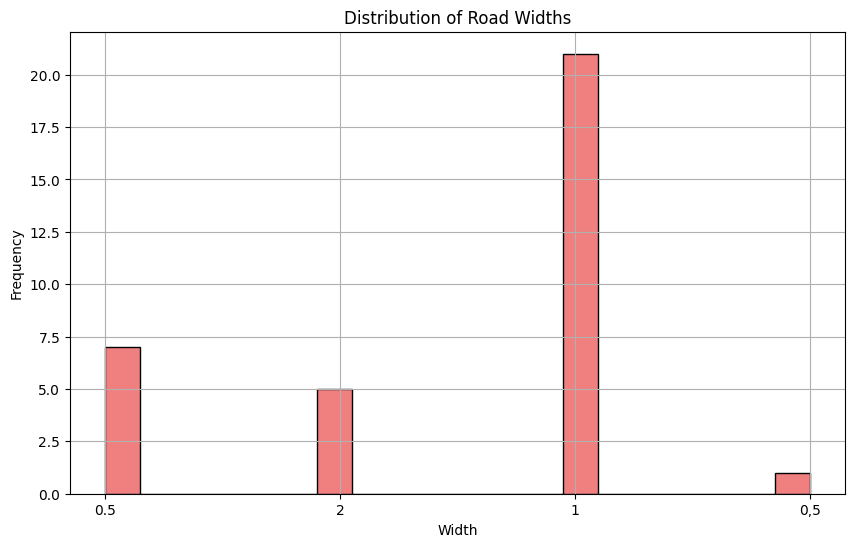

In [10]:
pedestrian_data['width'].hist(bins=20, color='lightcoral', edgecolor='black', figsize=(10, 6))
plt.title('Distribution of Road Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()

**Distribution of Surface Types**

Each bar corresponds to a unique surface type, and the height of the bar represents the frequency or count of occurrences of that particular surface type.

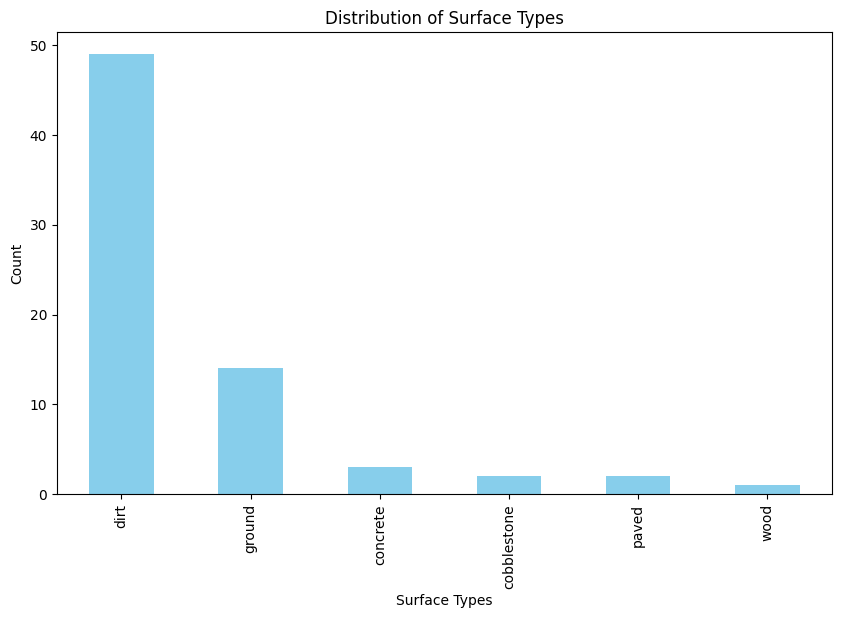

In [11]:
pedestrian_data['surface'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Distribution of Surface Types')
plt.xlabel('Surface Types')
plt.ylabel('Count')
plt.show()